In [1]:
import tensorflow as tf
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Jumlah image x_train', x_train.shape[0])
print('Jumlah image x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Jumlah image x_train 60000
Jumlah image x_test 10000


In [6]:
# Membuat model

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

result = model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.2026 - acc: 0.9399
Epoch 2/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.0828 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.0584 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.0441 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 47s 792us/step - loss: 0.0353 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 47s 789us/step - loss: 0.0293 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 47s 789us/step - loss: 0.0270 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0228 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0198 - acc: 0.9933
Epoch 10/10
60000/60000 [=========

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 247us/step


[0.06266307018779407, 0.985]

In [9]:
history = History()
print(result.history['loss'])

[0.20256888428156575, 0.08284946803761026, 0.058382033764508866, 0.04408517113715255, 0.03532928002503856, 0.029269861491726865, 0.026954690775636118, 0.02282683695447728, 0.019781919448290622, 0.020666372354590082]


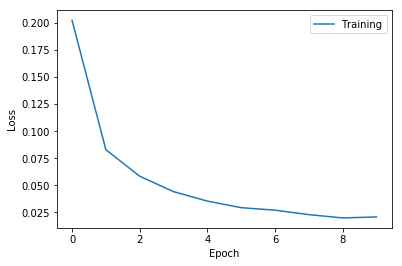

In [12]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'],label='Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

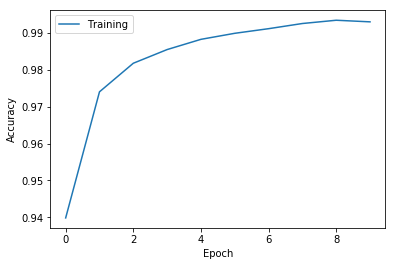

In [13]:
plt.plot(result.history['acc'],label='Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()